# 상관분석

## 1) 상관 분석의 정의

---

### 정의

- 두 변수 간의 **관계의 정도**를 알아보기 위한 분석방법이다.
- 두 변수가 반드시 **숫자형 자료** (서열척도, 비율척도, 등간척도) 형태로 존재해야 한다.
- 두 변수의 상관관계를 알아보기 위해 상관계수(Correlation coefficient )를 구해야 한다.

$$r = \frac{cov\left(x,y\right)}{S_x \times S_y} = \frac{\sum_{i=0}^{n}[\left(x-\bar{x}\right)\left(y-\bar{y}\right)]}{n\left(S_x \times S_y\right)}$$

### 데이터(변량)간에 서로 관계하는 정도의 정량화

- 단일 변량의 산포 정도를 알아볼 경우 분산을 확인한다.
- 2변량 간의 산포 정도를 알아볼 경우 공분산이나 상관계수(정형화된 공분산)을 확인한다.

## 2) 공분산

---

### 정의

- **2개의 확률변수의 상관정도**를 나타내는 값이다.(1개의 변수의 이산정도를 나타내는 분산과는 별개임)
- 만약 2개의 변수 중 하나의 값이 상승하는 경향을 보일 때, 다른 값도 상승하는 경향의 상관관계에 있다면, 공분산의 값은 양수가 될 것이다.
- 반대로 2개의 변수중 하나의 값이 상승하는 경향을 보일 때, 다른 값이 하강하는 경향을 보인다면 공분산의 값은 음수가 된다.
- `numpy.cov()` 함수를 사용하면 x의 분산, y의 분산과 함께 x와 y의 공분산을 계산

### 공분산의 해석

- **부호**:
    - 공분산이 `+`인 경우: 두 변수가 같은 방향으로 변화(하나가 증가하면 다른 하나도 증가)
    - 공분산이 `-`인 경우: 두 변수가 반대 방향으로 변화(하나가 증가하면 다른 하나는 감소)
- **크기**:
    - 공분산이 `0`이면 두 변수가 독립, 즉, **한 변수의 변화로 다른 변수의 변화를 예측하지 못함**
    - 공분산의 크기가 클 수록 두 변수는 함께 많이 변화
        - 단위에 따라 공분산의 크기가 달라지므로 **절대적 크기로 판단이 어려움**
        - 공분산을 `-1 ~ 1` 범위로 표준화 시킨 것이 **상관계수**
- **주의**: 공분산은 **선형적인 관계를 측정**하기 때문에 두 변수가 비선형적으로 함께 변하는 경우는 잘 측정하지 못함

## 3) 상관 계수 (Correlation Coefficient)

---

상관분석을 통해 도출한 값으로 두 변수가 얼마나 관련되어 있는지, 관련성의 정도를 파악할 수 있다.

- 상관계수는 `-1~1` 사이의 값을 갖는다.
- `1` 혹은 `-1`에 가까울 수록 관련성이 크다는 의미.
- 양수면 정비례, 음수면 반비례 관계임을 의미.

[상관 관계의 특성](https://www.notion.so/2a723ac9c4f5496a868a16ecde04b42b)

[상관 분석의 유형](https://www.notion.so/77814716d7644a2ca3dc119eb6107c15)

## 3) 상관분석의 가설 검정

---

- 상관계수 $r$이 0이면 입력변수(=독립변수) $x$와 출력변수(=종속변수) $y$사이에는 아무런 관계가 없다 .

    (귀무가설 : $r = 0$, 대립가설 : $r \neq 0$)

- t 검정통계량을 통해 얻은 p-value 값이 `0.05` 이하인 경우, 대립가설을 채택하게 되어 우리가 데이터를 통해 구한 상관계수를 활용할 수 있게 된다 .

## mtcars 상관분석 + 시각화

In [1]:
import numpy as np
from pandas import read_excel
from scipy import stats

mtcars = read_excel('http://itpaper.co.kr/data/mtcars.xlsx', engine='openpyxl')
mtcars.set_index('name', inplace = True)
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
name,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [2]:
np.cov(mtcars['mpg'], mtcars['cyl'])

array([[36.32410282, -9.17237903],
       [-9.17237903,  3.18951613]])

In [3]:
corr,p_value = stats.pearsonr(mtcars['cyl'], mtcars['wt'])
print("corr: {0}, p_value: {1}".format(corr, p_value))

corr: 0.7824957944632407, p_value: 1.2175670135436396e-07


In [4]:
import seaborn as sns
from matplotlib import pyplot as plt

plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams["axes.unicode_minus"] = False

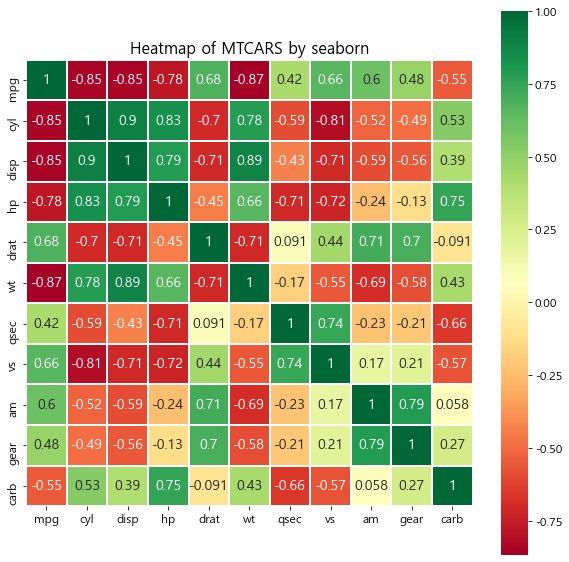

           mpg       cyl      disp        hp      drat        wt      qsec  \
mpg   1.000000 -0.852162 -0.847551 -0.776168  0.681172 -0.867659  0.418684   
cyl  -0.852162  1.000000  0.902033  0.832447 -0.699938  0.782496 -0.591242   
disp -0.847551  0.902033  1.000000  0.790949 -0.710214  0.887980 -0.433698   
hp   -0.776168  0.832447  0.790949  1.000000 -0.448759  0.658748 -0.708223   
drat  0.681172 -0.699938 -0.710214 -0.448759  1.000000 -0.712441  0.091205   
wt   -0.867659  0.782496  0.887980  0.658748 -0.712441  1.000000 -0.174716   
qsec  0.418684 -0.591242 -0.433698 -0.708223  0.091205 -0.174716  1.000000   
vs    0.664039 -0.810812 -0.710416 -0.723097  0.440278 -0.554916  0.744535   
am    0.599832 -0.522607 -0.591227 -0.243204  0.712711 -0.692495 -0.229861   
gear  0.480285 -0.492687 -0.555569 -0.125704  0.699610 -0.583287 -0.212682   
carb -0.550925  0.526988  0.394977  0.749812 -0.090790  0.427606 -0.656249   

            vs        am      gear      carb  
mpg   0.664039  

In [6]:
corr = mtcars.corr()

ax = sns.heatmap(corr,
                square = True,
                cmap='RdYlGn',
                linewidth = 0.1,
                linecolor = 'white',
                annot = True,
                annot_kws={'size' : 14})

plt.title('Heatmap of MTCARS by seaborn', fontsize = 16)
plt.show()

print(corr)

## 교통사고 발생건수, 부상자수, 사망자수 상관분석

In [20]:
traffic = read_excel('http://itpaper.co.kr/data/traffic.xlsx', engine='openpyxl')
traffic.set_index(['년도','월'], inplace=True)
traffic

발생건수  사망자수   부상자수
년도   월                     
2005 1   15494   504  25413
     2   13244   431  21635
     3   16580   477  25550
     4   17817   507  28131
     5   19085   571  29808
...        ...   ...    ...
2018 8   18335   357  27749
     9   18371   348  27751
     10  19738   373  28836
     11  19029   298  28000
     12  18010   323  26463

[168 rows x 3 columns]

In [21]:
corr, pvalue = stats.pearsonr(traffic['발생건수'], traffic['부상자수'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

상관계수: 0.9467014055220319, pvalue: 1.3930714487684012e-83


In [22]:
corr, pvalue = stats.pearsonr(traffic['발생건수'], traffic['사망자수'])
print('상관계수: {0}, pvalue: {1}'.format(corr,pvalue))

상관계수: 0.35060180047531364, pvalue: 3.1752798054687237e-06


In [23]:
corr = traffic.corr()
corr

,발생건수,사망자수,부상자수
발생건수,1.000000,0.350602,0.946701
사망자수,0.350602,1.000000,0.551918
부상자수,0.946701,0.551918,1.000000


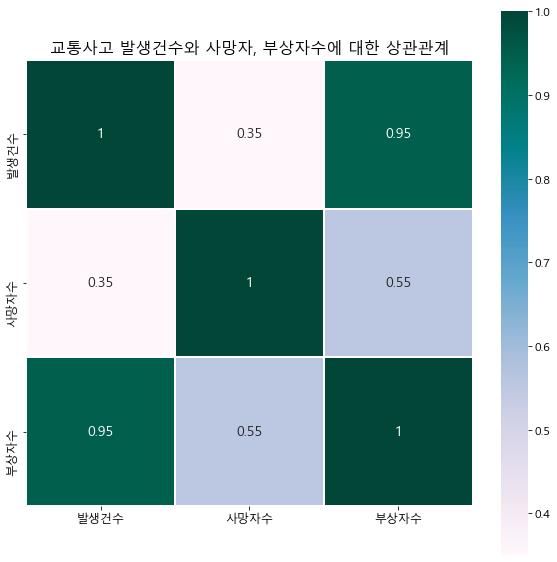

In [25]:
ax = sns.heatmap(corr,
                 square = True,
                 cmap='PuBuGn',
                 linewidth=0.1,
                 linecolor='white',
                 annot=True,
                 annot_kws={'size':14})

plt.title('교통사고 발생건수와 사망자, 부상자수에 대한 상관관계', fontsize = 16)

plt.show()

## 산점도 그래프

- 상관계수의 정도를 좌표평면 위에 점들로 시각화 한 그래프
- 두 변수 간의 영향력을 보여주기 위해 가로 축과 세로 축에 데이터 포인트를 그리는 그래프.
- 포인터들이 오밀조밀 뭉쳐 있으면 두 변수는 서로 관련성 정도가 높고 흩어져 있으면 관련성이 낮다고 분석한다.

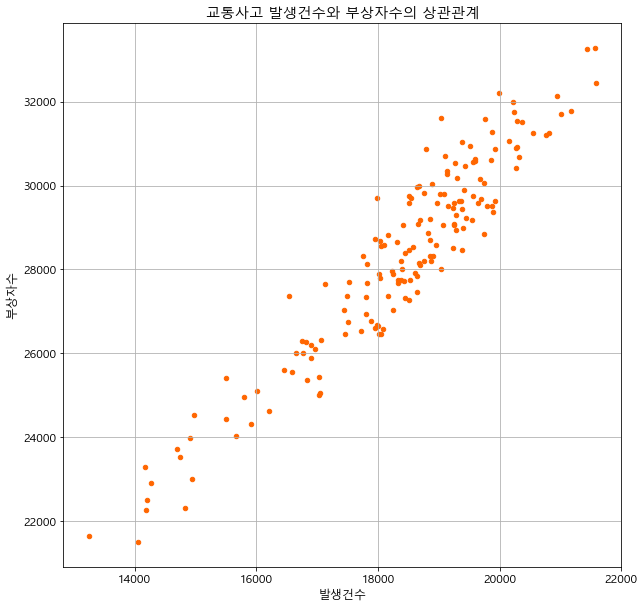

In [28]:
# 발생건수, 부상자수
traffic.plot.scatter(x='발생건수', y='부상자수', color='#ff6600', marker='o')
plt.grid()
plt.title('교통사고 발생건수와 부상자수의 상관관계')
plt.ylabel('부상자수')
plt.xlabel('발생건수')
plt.show()

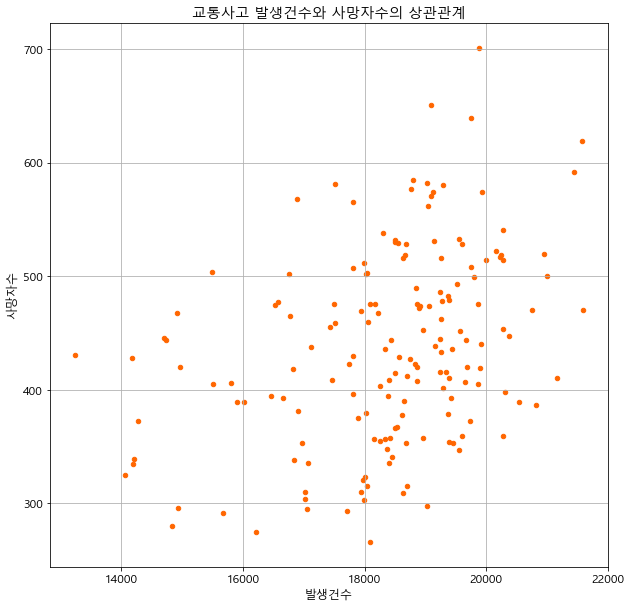

In [29]:
# 발생건수, 사망자수
traffic.plot.scatter(x='발생건수', y='사망자수', color='#ff6600', marker='o')
plt.grid()
plt.title('교통사고 발생건수와 사망자수의 상관관계')
plt.ylabel('사망자수')
plt.xlabel('발생건수')
plt.show()

## 추세선

## 1) 추세선의 이해

시계열 데이터가 시간이 지날수록 감소 혹은 증가하는 경향이 있는지 살펴볼 수 있는 보조선.

### 추세선과 상관계수의 관계

상관계수(correlation coefficient)는 이러한 직선관계의 기울기가 양인지 아니면 음인지를 보여주고 또 관계의 정도가 얼마나 강한지 아니면 약한지 등을 보여준다.

In [35]:
# 방정식 구하기

x = traffic['발생건수']
y = traffic['부상자수']

z = np.polyfit(x, y , 1)
a, b = z
print('기울기 %f, 절편 %f' %(a,b))

기울기 1.404418, 절편 2495.338547


In [36]:
# 1차 방정식 객체 생성
f = np.poly1d(z)
f

poly1d([1.40441810e+00, 2.49533855e+03])

In [37]:
# 발생건수를 매개변수로 전달하여 부상자 수 계산

f(traffic['발생건수'])

array([24255.39254637, 21095.45182744, 25780.59060004, 27517.8557864 ,
       29298.65793378, 27904.07076316, 28722.84651389, 29228.43702892,
       28840.81763406, 30242.42689517, 29360.45233006, 28482.69101925,
       23520.88188148, 22536.38479527, 26043.21678423, 27701.83455715,
       29375.90092913, 26981.36807323, 28665.2653719 , 28889.97226747,
       29590.77689802, 29319.72420524, 30410.95706684, 27095.12593911,
       23440.83004993, 23134.66690472, 28007.99770236, 27852.10729356,
       29550.0487732 , 28210.23390837, 27826.82776781, 27749.58477246,
       28485.49985544, 29215.79726604, 27515.04695021, 26217.3646283 ,
       23197.8657191 , 22404.36949412, 26022.15051277, 27069.84641336,
       29902.55771562, 28932.10481039, 29968.56536619, 28540.27216124,
       27807.16591445, 30479.77355361, 30017.7199996 , 28705.99349672,
       25713.17853137, 24266.62789114, 28089.453952  , 29394.1583644 ,
       30916.54758187, 29528.98250174, 30978.34197816, 30573.86956613,
      

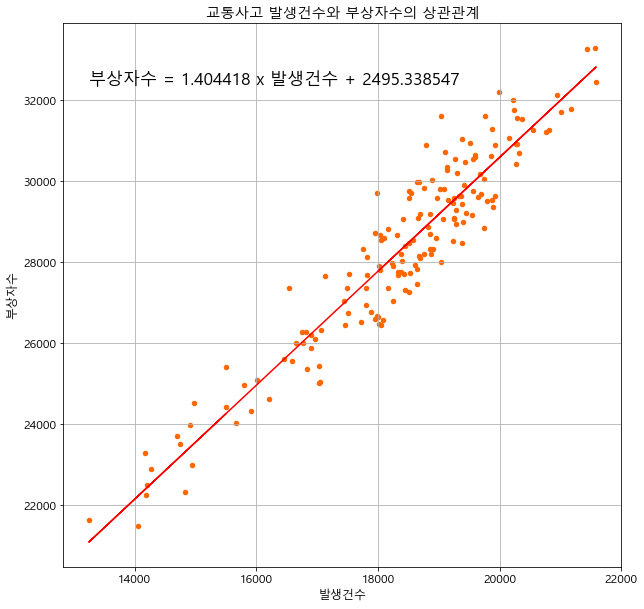

In [39]:
# 시각화

traffic.plot.scatter(x = '발생건수', y = '부상자수', color = '#ff6600', marker = 'o')
plt.grid()
plt.title('교통사고 발생건수와 부상자수의 상관관계')
plt.ylabel('부상자수')
plt.xlabel('발생건수')
plt.plot(x,f(x),'#ff0000')

plt.text(traffic['발생건수'].min(), traffic['부상자수'].max()-1000,
        '부상자수 = %f x 발생건수 + %f' %(a,b),
        fontsize = 17, color = 'black', 
         horizontalalignment='left', verticalalignment='bottom')
plt.show()